<a href="https://colab.research.google.com/github/VishalKushwaha-godPlay/FDS-LABwork/blob/main/Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,420 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [10]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [20]:
from google.colab import files
uploaded = files.upload()

Saving example2.jpg to example2 (1).jpg


In [21]:
image_path_in_colab='/content/drive/MyDrive/images/example2.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

45 FONTS THAT
LOOK LIKE HANDWRITING



In [25]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename)) 
    return text

print(ocr_core(''))

AttributeError: ignored

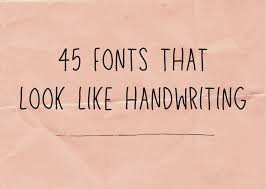

In [26]:
from google.colab.patches import cv2_imshow
import numpy as np
import pytesseract
import imutils
import cv2

img = cv2.imread("/content/drive/MyDrive/images/example2.jpg")
#cv2.imshow("original", img)

# turn into gray for next processing
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV * cv2.THRESH_OTSU)[1]
thresh = cv2.bitwise_not(thresh)

# omit the underline
kernel = np.ones((4, 4), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)

# dilate to make the line thicker
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 12))
dilation = cv2.dilate(erosion, kernel, iterations=1)

# find the contour
cntrs = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

result = img.copy()
for c in cntrs:
    # for each letter, create red rectangle
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # prepare letter for OCR
    box = thresh[y:y + h - 2, x:x + w]
    box = cv2.bitwise_not(box)
    box = cv2.GaussianBlur(box, (3, 3), 0)

    # retreive the angle. For the meaning of angle, see below
    # https://namkeenman.wordpress.com/2015/12/18/open-cv-determine-angle-of-rotatedrect-minarearect/
    rect = cv2.minAreaRect(c)
    angle = rect[2]

    # put angle below letter
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (x, y+h+20)
    fontScale = 0.6
    fontColor = (255, 0, 0)
    lineType = 2
    cv2.putText(result, str(angle), bottomLeftCornerOfText, font, fontScale, fontColor, lineType)

    # do the OCR
    custom_config = r'-l eng --oem 3 --psm 10'
    text = pytesseract.image_to_string(box, config=custom_config)
    print("Detected :" + text + ", angle: " + str(angle))

cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()
